In [19]:
# Import libraries
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load engagement data
eng = pd.read_csv('data/engagement.csv')
eng

,patient_id,date,action_type,action_count
0,1,2025-06-01,login,2
1,1,2025-06-03,article,1
2,2,2025-06-05,message,3
3,3,2025-06-02,login,1
4,3,2025-06-04,video,2
5,4,2025-06-07,login,4
6,5,2025-06-08,article,1
7,6,2025-06-09,login,3
8,7,2025-06-10,message,2
9,8,2025-06-11,login,1


In [3]:
# Load patient data
patient_df = pd.read_csv('data/patients.csv')
patient_df

,patient_id,gender,age,region,signup_date
0,1,M,34,East,2025-01-15
1,2,F,47,North,2024-12-20
2,3,M,55,South,2025-02-02
3,4,F,29,West,2025-01-10
4,5,F,38,East,2024-12-28
5,6,M,63,North,2025-02-14
6,7,M,41,West,2025-01-22
7,8,F,26,South,2024-12-18
8,9,M,53,East,2025-02-05
9,10,F,37,West,2025-01-27


In [4]:
# Merging both datasets
df = pd.merge(left=patient_df, right=eng, how='left')
df

,patient_id,gender,age,region,signup_date,date,action_type,action_count
0,1,M,34,East,2025-01-15,2025-06-01,login,2.0
1,1,M,34,East,2025-01-15,2025-06-03,article,1.0
2,2,F,47,North,2024-12-20,2025-06-05,message,3.0
3,3,M,55,South,2025-02-02,2025-06-02,login,1.0
4,3,M,55,South,2025-02-02,2025-06-04,video,2.0
5,4,F,29,West,2025-01-10,2025-06-07,login,4.0
6,5,F,38,East,2024-12-28,2025-06-08,article,1.0
7,6,M,63,North,2025-02-14,2025-06-09,login,3.0
8,7,M,41,West,2025-01-22,2025-06-10,message,2.0
9,8,F,26,South,2024-12-18,2025-06-11,login,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    12 non-null     int64  
 1   gender        12 non-null     object 
 2   age           12 non-null     int64  
 3   region        12 non-null     object 
 4   signup_date   12 non-null     object 
 5   date          10 non-null     object 
 6   action_type   10 non-null     object 
 7   action_count  10 non-null     float64
dtypes: float64(1), int64(2), object(5)
memory usage: 900.0+ bytes


In [ ]:
# Convert into datetime 
df["signup_date"] = pd.to_datetime(df["signup_date"])
df["date"] = pd.to_datetime(df["date"])

In [17]:
# Assign each age into age group.
def age_groups(age):
    if 18 <= age <= 29:
        return '18-29'
    elif 30 <= age <= 44:
        return '30-44'
    elif 45 <= age <= 59:
        return '45-59'
    else:
        return '60+'

df["age_group"] = df["age"].apply(age_groups)
df
    

,patient_id,gender,age,region,signup_date,date,action_type,action_count,first_engagement_date,age_group
0,1,M,34,East,2025-01-15,2025-06-01,login,2.0,2025-06-01,30-44
1,1,M,34,East,2025-01-15,2025-06-03,article,1.0,2025-06-01,30-44
2,2,F,47,North,2024-12-20,2025-06-05,message,3.0,2025-06-05,45-59
3,3,M,55,South,2025-02-02,2025-06-02,login,1.0,2025-06-02,45-59
4,3,M,55,South,2025-02-02,2025-06-04,video,2.0,2025-06-02,45-59
5,4,F,29,West,2025-01-10,2025-06-07,login,4.0,2025-06-07,18-29
6,5,F,38,East,2024-12-28,2025-06-08,article,1.0,2025-06-08,30-44
7,6,M,63,North,2025-02-14,2025-06-09,login,3.0,2025-06-09,60+
8,7,M,41,West,2025-01-22,2025-06-10,message,2.0,2025-06-10,30-44
9,8,F,26,South,2024-12-18,2025-06-11,login,1.0,2025-06-11,18-29


### 1. Avg days from signup to first engagement date(By gender, region, age group.)

In [ ]:
# Plotting charts for average days it takes for a patient to interact with the app from signup.
def time_to_first_engagement(
    df: pd.DataFrame,
    group_col: str,
    patient_col: str = "patient_id",
    signup_col: str = "signup_date",
    engagement_date_col: str = "date",
    plot: bool = True,
):
    """
    Compute average days from signup to first engagement, summarized by a grouping column
    (e.g., 'gender', 'region', etc.).
    """

    # Ensure datetime types
    df = df.copy()

    # Getting only the columns we want and removing nulls and duplicates
    patient_attrs = (
        df[[patient_col, group_col, signup_col]]
        .dropna(subset=[patient_col])
        .drop_duplicates(subset=[patient_col])
    )

    # First engagement per patient
    first_eng = (
        df[df[engagement_date_col].notna()]
        .groupby(patient_col, as_index=False)[engagement_date_col]
        .min()
        .rename(columns={engagement_date_col: "first_engagement_date"})
    )

    # Merge
    per_patient = patient_attrs.merge(first_eng, on=patient_col, how="left")

    # Compute days
    per_patient["days_to_first_engagement"] = (
        per_patient["first_engagement_date"] - per_patient[signup_col]
    ).dt.days

    # summary
    summary = (
        per_patient
        .groupby(group_col, dropna=False)
        .agg(
            total_patients=(patient_col, "nunique"),
            users_with_engagement=("days_to_first_engagement", lambda s: s.notna().sum()),
            mean_days=("days_to_first_engagement", "mean"),
        )
        .reset_index()
    )
    summary["engagement_rate"] = (
        summary["users_with_engagement"] / summary["total_patients"]
    )

    # Plot
    if plot:
        means = summary[[group_col, "mean_days"]].dropna()
        if not means.empty:
            plt.figure()
            plt.bar(means[group_col].astype(str), means["mean_days"])
            plt.title(f"Average Days: Signup → First Engagement by {group_col.capitalize()}")
            plt.xlabel(group_col.capitalize())
            plt.ylabel("Mean Days")
            plt.tight_layout()
            plt.show()

    return per_patient, summary


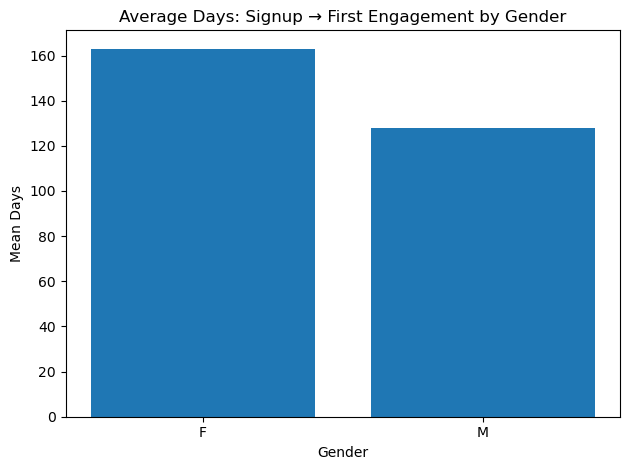

In [11]:
# By gender
per_patient_gender, summary_gender = time_to_first_engagement(df, group_col="gender")

In [14]:
summary_gender

,gender,total_patients,users_with_engagement,mean_days,engagement_rate
0,F,5,4,163.00,0.8
1,M,5,4,127.75,0.8


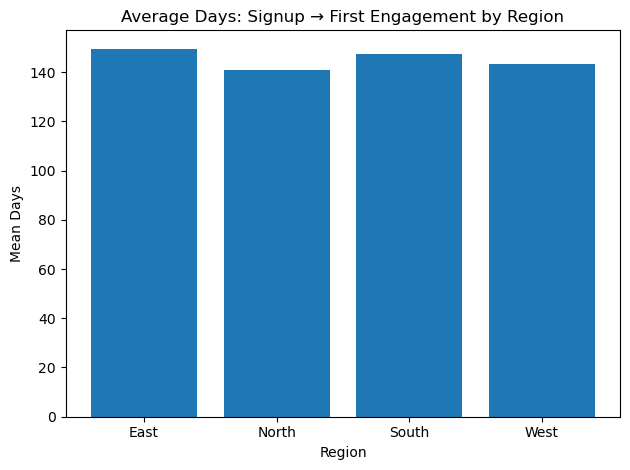

In [16]:
# By region
per_patient_region, summary_region = time_to_first_engagement(df, group_col="region")

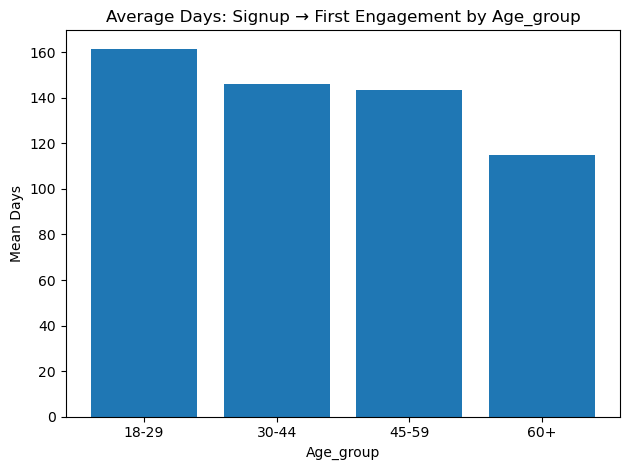

In [18]:
# By age-group
per_patient_age_group, summary_age_group = time_to_first_engagement(df, group_col="age_group")

### 2. How are patients engaging with the app? (By Age group, gender, region)

In [ ]:
def engagement_by_group(
    df: pd.DataFrame,
    group_col: str,
    patient_col: str = "patient_id",
    action_col: str = "action_type",
    plot: bool = True,
    figsize=(8, 5),
    group_order: list | None = None,  
    action_order: list | None = None  
):
    """
    Summarize app engagement by group (age_group / gender / region, etc.).

    Returns:
      heatmap: For a group_col, how are the engagement actions divided.
    """
    data = df.copy()

    # Keep only rows that actually represent an app action
    data = data.dropna(subset=[patient_col, action_col])
    
    # Per Column summary of action_type
    per_user_action = data.groupby([group_col, action_col]).size().reset_index(name='count')
    
    # Compute percentage within each grouping column
    per_user_action["percent"] = (
    per_user_action["count"] / per_user_action.groupby(group_col)["count"].transform("sum") * 100)
    print(per_user_action)
    
    # Build pivot
    pivot = (
        per_user_action
        .pivot(index=group_col, columns=action_col, values="percent")
        .fillna(0.0)
        .astype(float)
    )

    # Choose defaults for ordering
    if group_order is None:
        # If group_col is categorical, respect that order
        if pd.api.types.is_categorical_dtype(data[group_col]):
            group_order = list(data[group_col].cat.categories)
        else:
            # default for age buckets if they look like them
            AGE_BUCKETS = ["<18", "18-29", "30-44", "45-59", "60+"]
            vals = list(map(str, data[group_col].unique()))
            if any(v in AGE_BUCKETS for v in vals):
                group_order = [b for b in AGE_BUCKETS if b in pivot.index]
            else:
                # Otherwise alphabetical/natural sort of index
                group_order = list(pivot.index.sort_values())

    if action_order is None:
        action_order = list(pivot.columns.sort_values())

    # Apply ordering (ignore missing labels gracefully)
    pivot = pivot.reindex(index=[g for g in group_order if g in pivot.index],
                          columns=[a for a in action_order if a in pivot.columns],
                          fill_value=0)

    # Plot
    if plot:
        plt.figure(figsize=figsize)
        ax = sns.heatmap(
            pivot, cmap="Blues", vmin=0, vmax=100,
            cbar_kws={"label": "Percent"},
            linewidths=.5, linecolor="white"
        )

        # Manual labels to guarantee visibility
        for i in range(pivot.shape[0]):
            for j in range(pivot.shape[1]):
                v = pivot.iat[i, j]
                ax.text(j + 0.5, i + 0.5, f"{v:.1f}%",
                        ha="center", va="center",
                        color=("white" if v >= 50 else "black"),
                        fontsize=10)

        ax.set_title(f"Action Type Engagement by {group_col} (%)")
        ax.set_ylabel(group_col)
        ax.set_xlabel(action_col)
        plt.xticks(rotation=0); plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

    return per_user_action, pivot


  age_group action_type  count     percent
0     18-29       login      2  100.000000
1     30-44     article      2   50.000000
2     30-44       login      1   25.000000
3     30-44     message      1   25.000000
4     45-59       login      1   33.333333
5     45-59     message      1   33.333333
6     45-59       video      1   33.333333
7       60+       login      1  100.000000


/var/folders/3k/s3c6nxcs2r989s7pxzk9rh5r0000gn/T/ipykernel_49272/2928115508.py:41: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(data[group_col]):


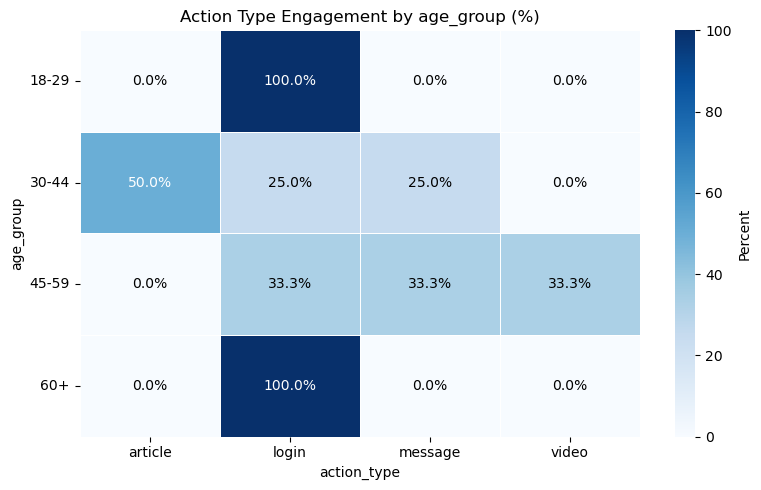

In [55]:
_, pv_age = engagement_by_group(df, group_col="age_group")

  region action_type  count    percent
0   East     article      2  66.666667
1   East       login      1  33.333333
2  North       login      1  50.000000
3  North     message      1  50.000000
4  South       login      2  66.666667
5  South       video      1  33.333333
6   West       login      1  50.000000
7   West     message      1  50.000000


/var/folders/3k/s3c6nxcs2r989s7pxzk9rh5r0000gn/T/ipykernel_49272/2928115508.py:41: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(data[group_col]):


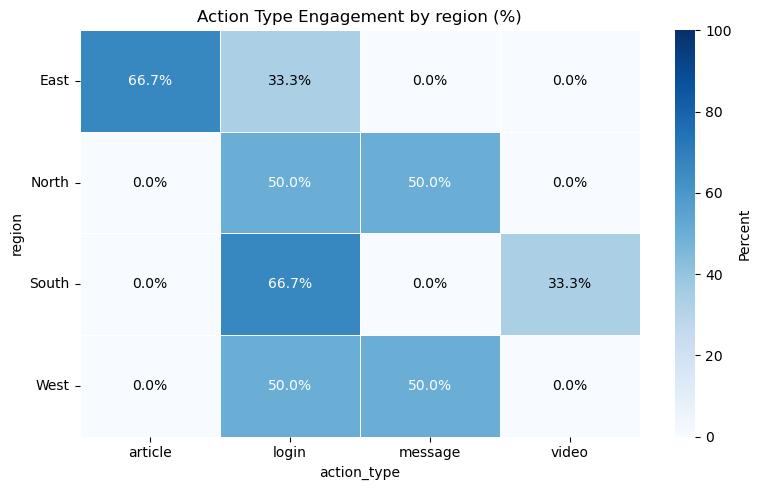

In [56]:
# For region (alphabetical)
_, pv_region = engagement_by_group(df, group_col="region")

  gender action_type  count    percent
0      F     article      1  25.000000
1      F       login      2  50.000000
2      F     message      1  25.000000
3      M     article      1  16.666667
4      M       login      3  50.000000
5      M     message      1  16.666667
6      M       video      1  16.666667


/var/folders/3k/s3c6nxcs2r989s7pxzk9rh5r0000gn/T/ipykernel_49272/2928115508.py:41: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(data[group_col]):


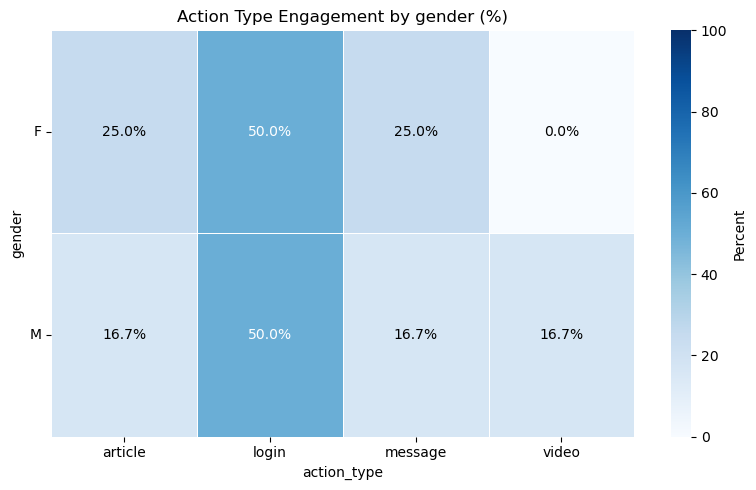

In [57]:
# For region (alphabetical)
_, pv_region = engagement_by_group(df, group_col="gender")

### Insights:
1. Gender differences: On average, female users take longer to engage with the app after signup compared to male users.

2. Regional patterns: Engagement timing does not show significant variation across regions.

3. Age group behavior: Younger adults (18–29) have the longest delay before engaging, and the time to engagement decreases with older age groups.

4. Interaction types: The 18–29 and 60+ groups primarily log in but show little engagement with other app features.

5. Content preferences: Articles are mostly read by users in the East region.

6. Gender-specific usage: None of the female patients in the dataset have watched videos on the app.